In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline


from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('data.csv') #Import the data


In [3]:
data.head() #let us see the ROW x COLS

ID  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302  Malignant        17.99         10.38          122.80     1001.0   
1    842517  Malignant        20.57         17.77          132.90     1326.0   
2  84300903  Malignant        19.69         21.25          130.00     1203.0   
3  84348301  Malignant        11.42         20.38           77.58      386.1   
4  84358402  Malignant        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [4]:
data.info() #Let us find out more about the data and their types!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
ID                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
data.describe() #Just some description 

ID  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [6]:
data["diagnosis"].describe() #Descriptive Stats on the diagnosis

count        569
unique         2
top       Benign
freq         357
Name: diagnosis, dtype: object

In [8]:
data['diagnosis'].value_counts() #Okay better!! thanks Pandas :)

Benign       357
Malignant    212
Name: diagnosis, dtype: int64

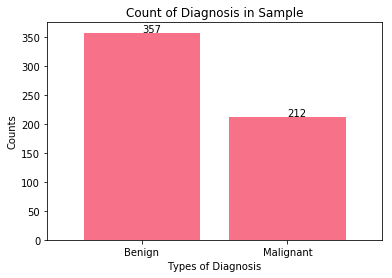

In [11]:
data['diagnosis'].value_counts().plot(kind='bar') #Let us make a visual of the data 

#Add count over the bar
ax=data['diagnosis'].value_counts().plot.bar(width=.8)
for i, v in data['diagnosis'].value_counts().reset_index().iterrows():
    ax.text(i, v.diagnosis + 0.3, v.diagnosis, color='black')
    
plt.xticks(rotation='horizontal') #Rotate xticks
plt.xlabel('Types of Diagnosis')
plt.ylabel('Counts')
plt.title('Count of Diagnosis in Sample')
plt.show()

<Figure size 1152x1152 with 0 Axes>

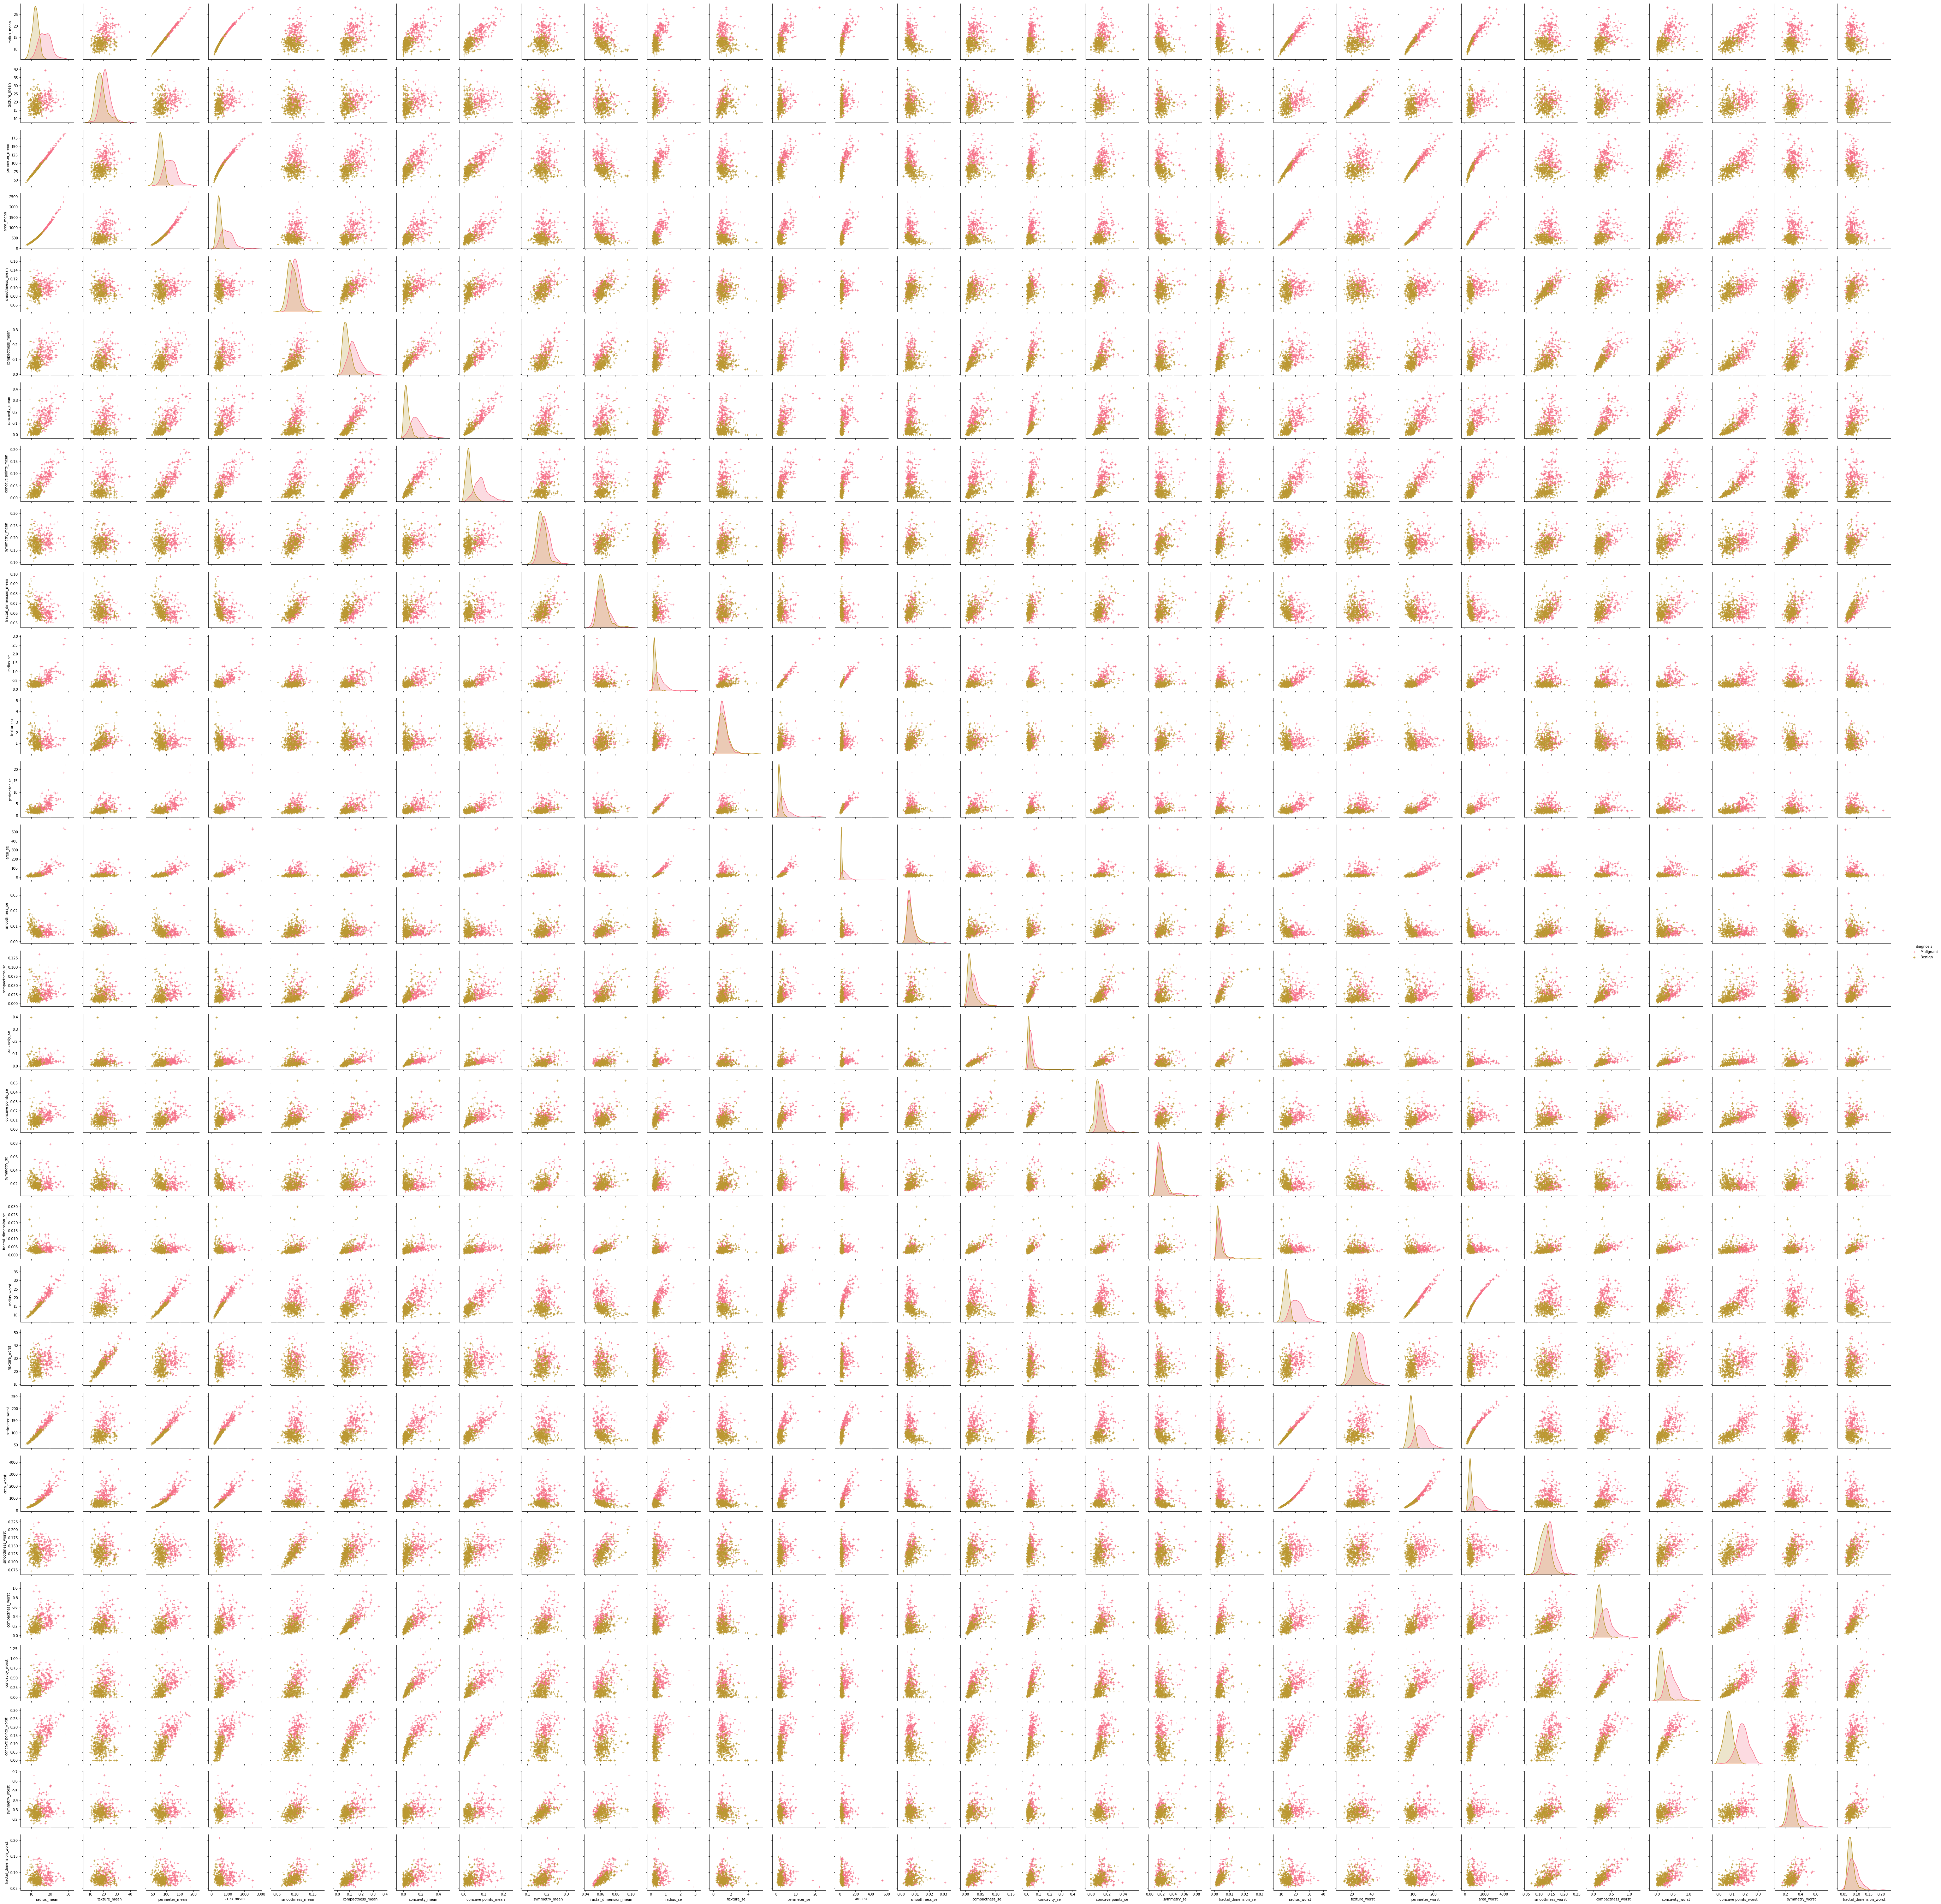

In [19]:
plt.figure(figsize = (16,16))
tmp = data.drop('ID', axis=1) #We can drop ID, for it isn't useful for our pairplot
g = sns.pairplot(tmp, hue='diagnosis', markers='+')
plt.show()

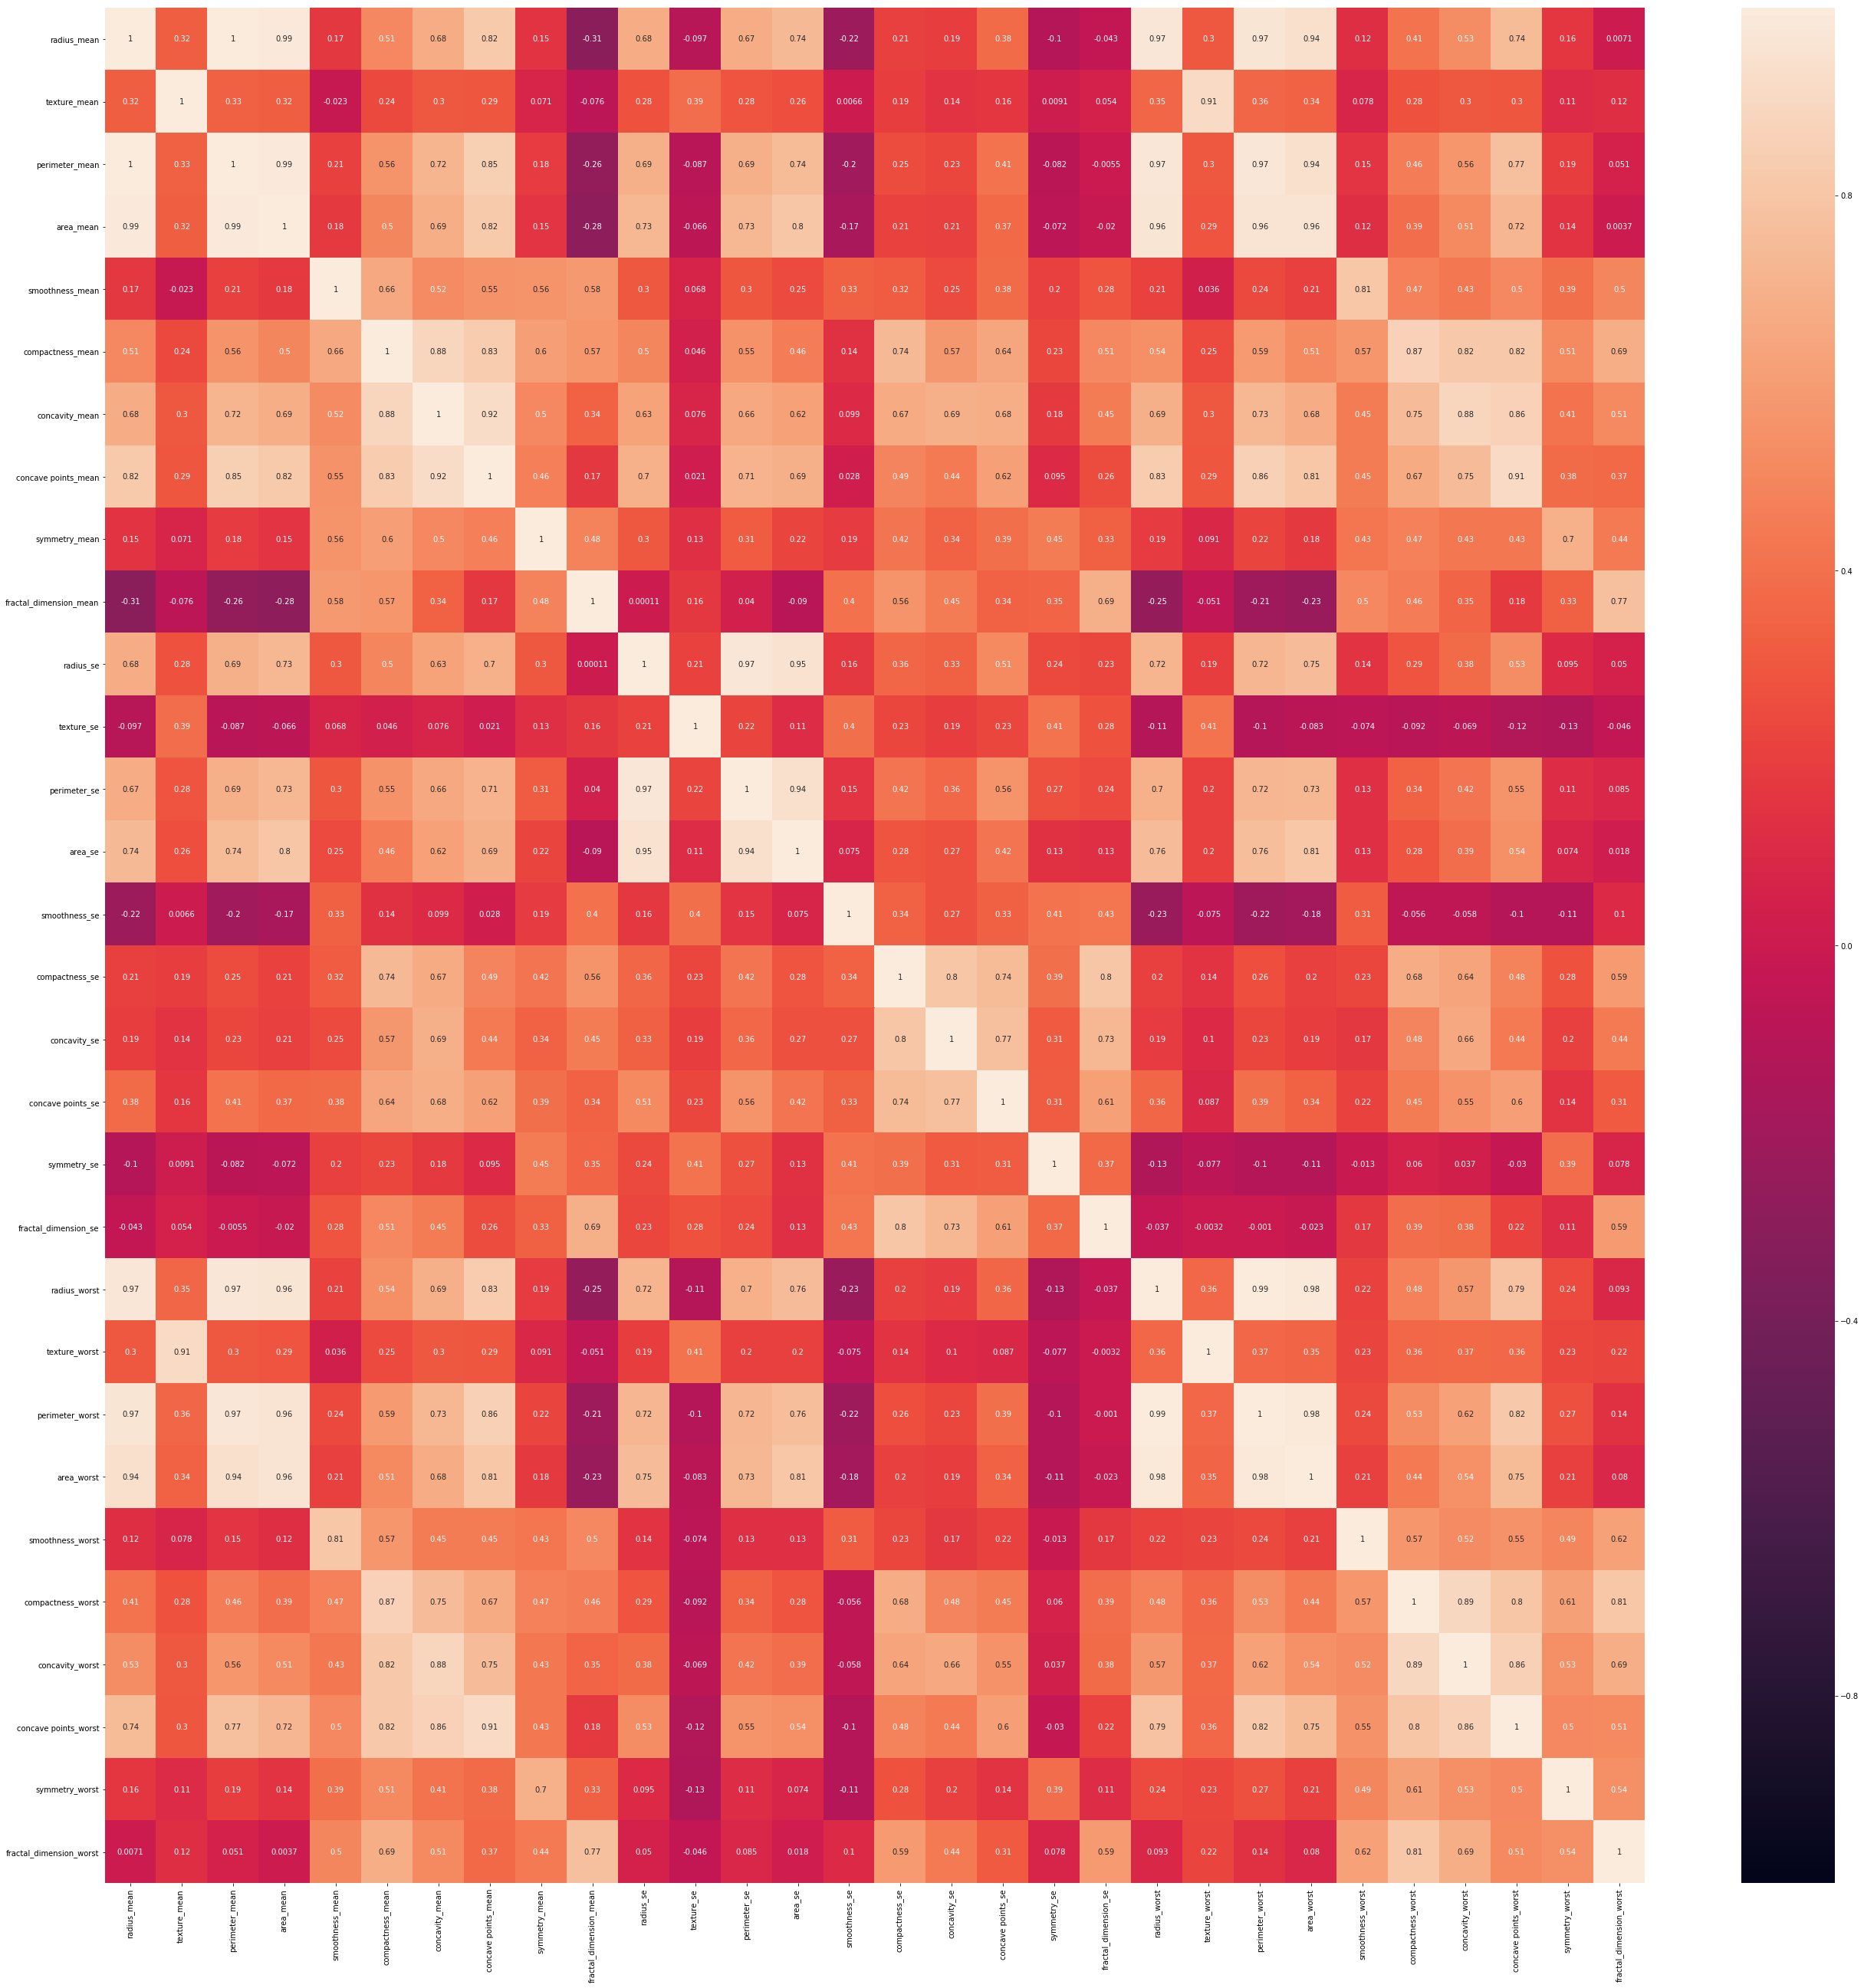

In [18]:
#Pairwise correlation between attributes
plt.figure(figsize = (45,45))
sns.heatmap(data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean','symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se','perimeter_se', 'area_se', 'smoothness_se', 'compactness_se','concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se','radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst','smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst','symmetry_worst', 'fractal_dimension_worst' ]].corr(), vmin = -1, vmax=1, annot=True)
plt.show()

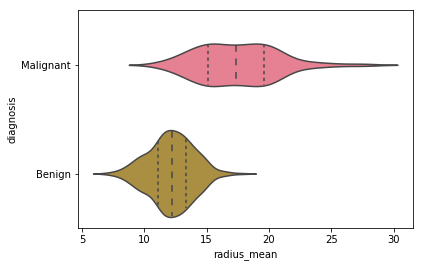

In [20]:
g = sns.violinplot(y='diagnosis', x='radius_mean', data=data, inner='quartile')
plt.show()

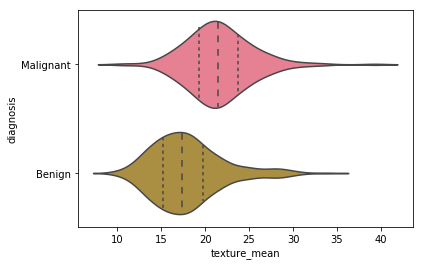

In [21]:
g = sns.violinplot(y='diagnosis', x='texture_mean', data=data, inner='quartile')
plt.show()

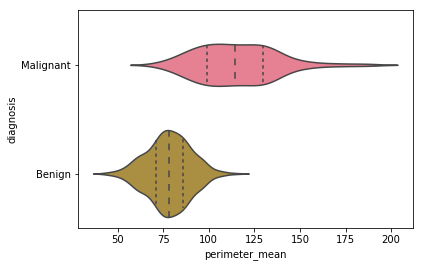

In [22]:
g = sns.violinplot(y='diagnosis', x='perimeter_mean', data=data, inner='quartile')
plt.show()

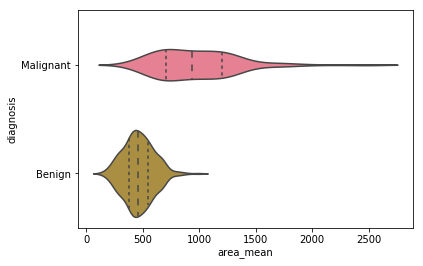

In [23]:
g = sns.violinplot(y='diagnosis', x='area_mean', data=data, inner='quartile')
plt.show()

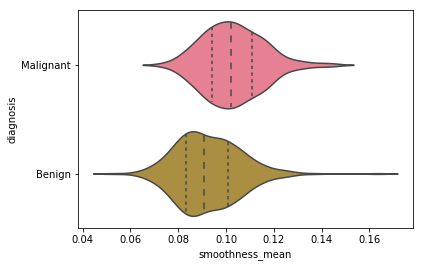

In [28]:
g = sns.violinplot(y='diagnosis', x='smoothness_mean', data=data, inner='quartile')
plt.show()

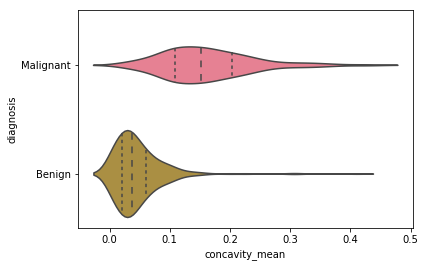

In [29]:
g = sns.violinplot(y='diagnosis', x='concavity_mean', data=data, inner='quartile')
plt.show()

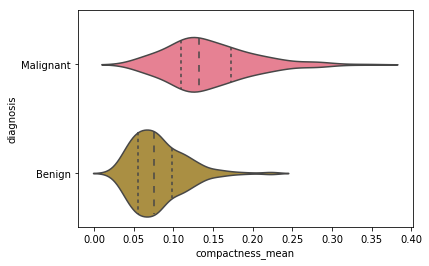

In [30]:
g = sns.violinplot(y='diagnosis', x='compactness_mean', data=data, inner='quartile')
plt.show()

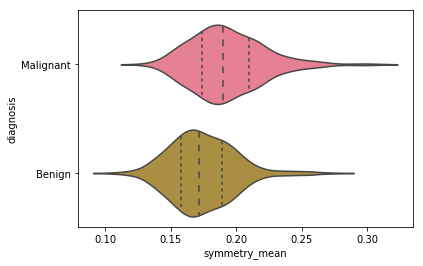

In [31]:
g = sns.violinplot(y='diagnosis', x='symmetry_mean', data=data, inner='quartile')
plt.show()

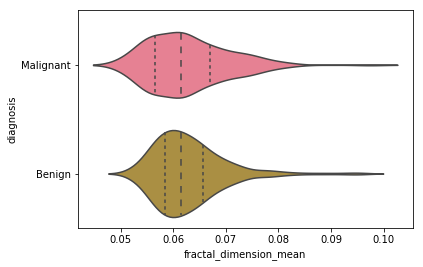

In [32]:
g = sns.violinplot(y='diagnosis', x='fractal_dimension_mean', data=data, inner='quartile')
plt.show()

In [33]:
X = data.drop(['ID', 'diagnosis'], axis=1)
y = data['diagnosis']
print(X.shape)
print(y.shape)

(569, 30)
(569,)


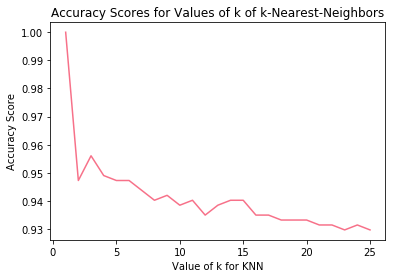

In [34]:
# experimenting with different n values to get optimal value for K for KNN model
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [35]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9595782073813708


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5) #Split into testing and training data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(341, 30)
(341,)
(228, 30)
(228,)


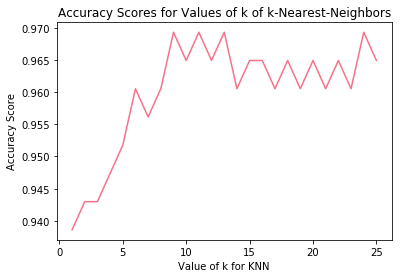

In [37]:
# experimenting with different n values again 
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [38]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9824561403508771


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=12, p=2,
           weights='uniform')

In [40]:
knn.predict([[18.5,10,100,899,.12,.23,.3,.15,.25,.09,1,.98,8.9,78,.009,.04,.05,.015,.09,.07,24,17.9,186,1956,.123,.66,.7,.26,.45,.11]]) #predict if maligant or not

array(['Malignant'], dtype=object)